In [1]:
import pandas as pd
import os

In [2]:
os.getcwd()

'/Users/pankaj/Downloads/movie visualisation'

In [3]:
movie= pd.read_csv("P4-Movie-Ratings.csv")

In [4]:
movie.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [5]:
movie.describe()

,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [6]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film                         559 non-null object
Genre                        559 non-null object
Rotten Tomatoes Ratings %    559 non-null int64
Audience Ratings %           559 non-null int64
Budget (million $)           559 non-null int64
Year of release              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [7]:
movie.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [8]:
movie.columns=['Film', 'Genre', 'CriticRating', 'AudienceRatings',
       'Budgetmillion', 'Yearrelease']

In [9]:
movie.tail()

,Film,Genre,CriticRating,AudienceRatings,Budgetmillion,Yearrelease
554,Your Highness,Comedy,26,36,50,2011
555,Youth in Revolt,Comedy,68,52,18,2009
556,Zodiac,Thriller,89,73,65,2007
557,Zombieland,Action,90,87,24,2009
558,Zookeeper,Comedy,14,42,80,2011


In [10]:
movie.Genre=movie.Genre.astype("category")

In [11]:
movie.Film=movie.Film.astype("category")
movie.Genre=movie.Genre.astype("category")
movie.Yearrelease=movie.Yearrelease.astype("category")

In [12]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film               559 non-null category
Genre              559 non-null category
CriticRating       559 non-null int64
AudienceRatings    559 non-null int64
Budgetmillion      559 non-null int64
Yearrelease        559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [13]:
import seaborn as sns

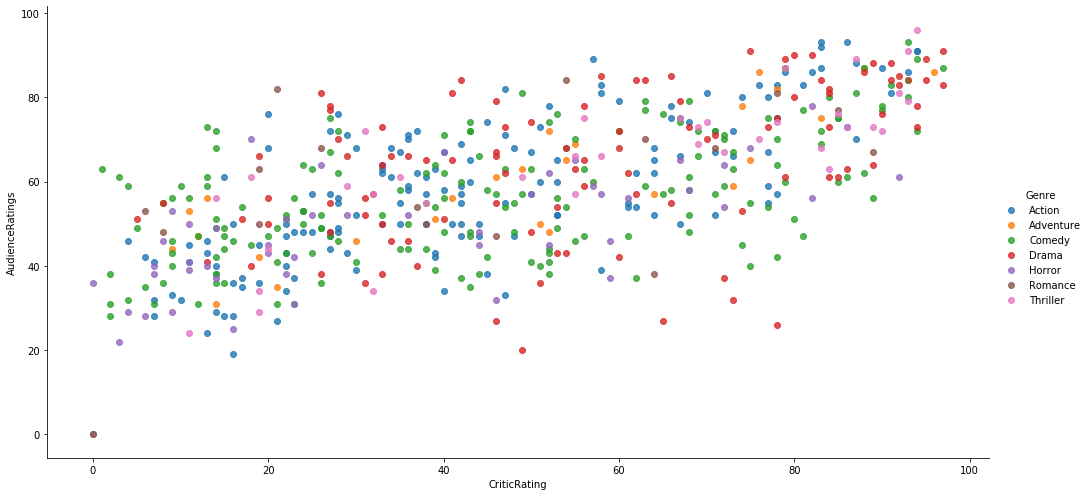

In [14]:
sns.lmplot(data=movie, x='CriticRating',y='AudienceRatings',size=7,aspect=2,hue="Genre",fit_reg=False)

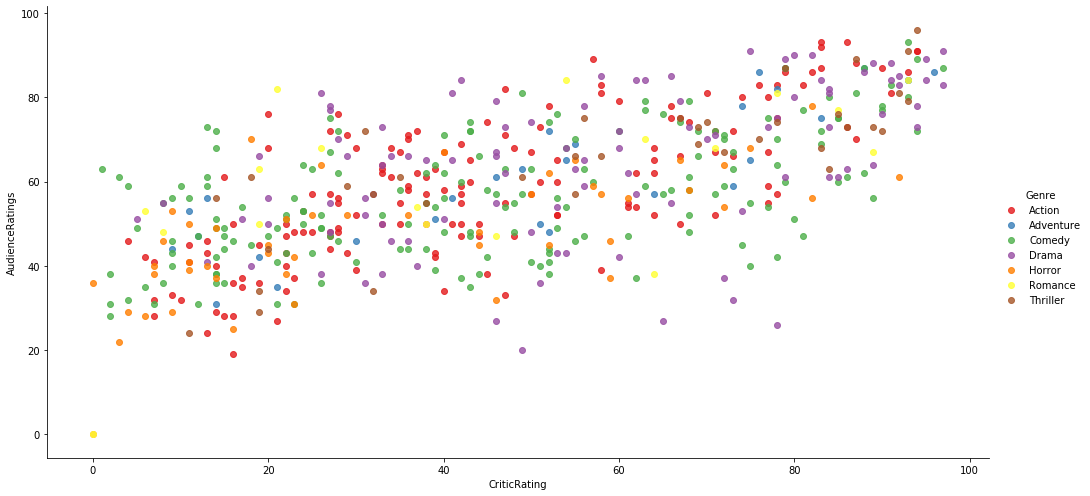

In [15]:
sns.lmplot(data=movie, x='CriticRating',y='AudienceRatings',size=7,aspect=2,hue="Genre",fit_reg=False,palette="Set1")

In [16]:
movie.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

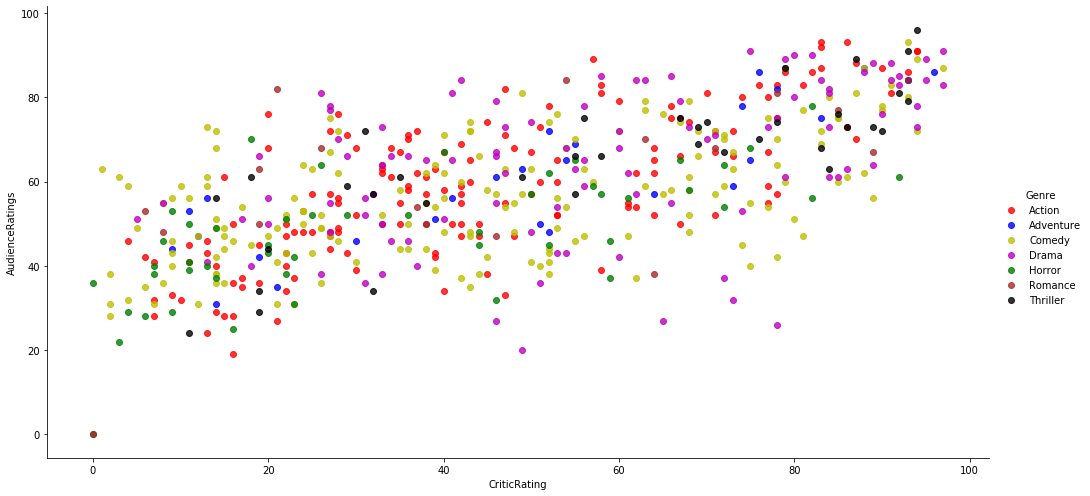

In [17]:
sns.lmplot(data=movie, x='CriticRating',y='AudienceRatings',size=7,aspect=2,hue="Genre",fit_reg=False,palette=dict(Action='r', Adventure='b', Comedy='y', Drama='m', Horror='g', Romance='brown',
       Thriller='black'))

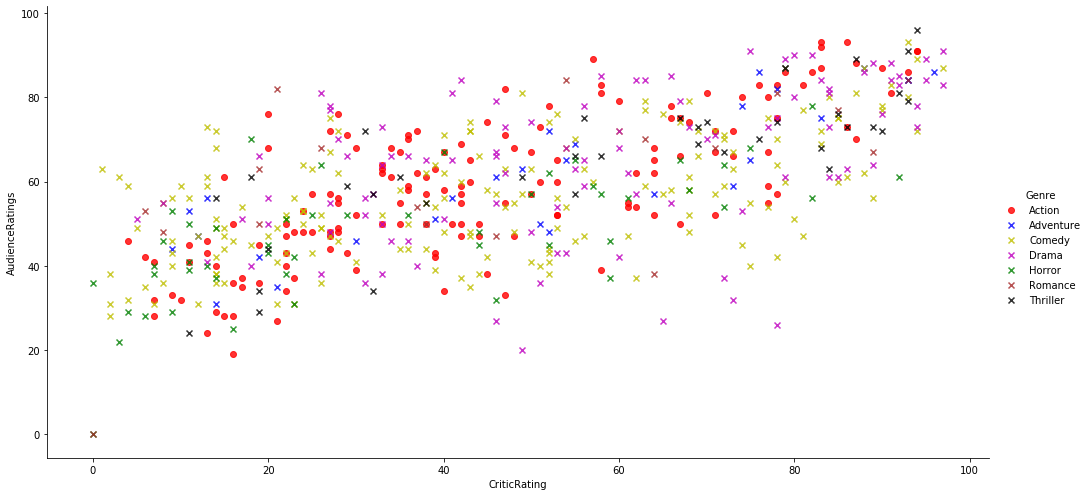

In [18]:
sns.lmplot(data=movie, x='CriticRating',y='AudienceRatings',size=7,aspect=2,hue="Genre",fit_reg=False,palette=dict(Action='r', Adventure='b', Comedy='y', Drama='m', Horror='g', Romance='brown',Thriller='black'),markers=["o","x","x","x","x","x","x"])

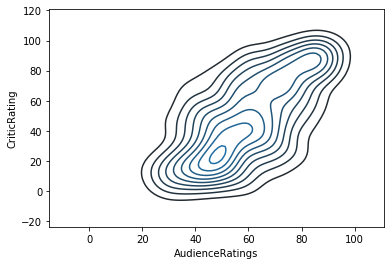

In [19]:
sns.kdeplot(movie.AudienceRatings,movie.CriticRating)

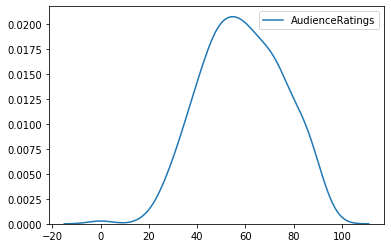

In [20]:
sns.kdeplot(movie.AudienceRatings)

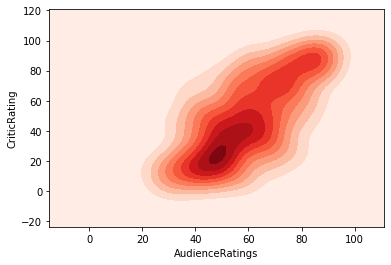

In [21]:
sns.kdeplot(movie.AudienceRatings,movie.CriticRating,shade=True,cmap="Reds")

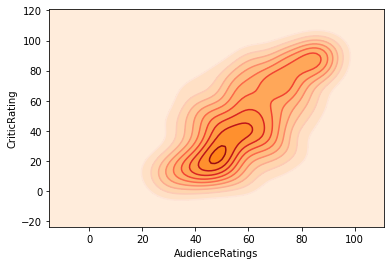

In [22]:
sns.kdeplot(movie.AudienceRatings,movie.CriticRating,cmap="Reds")
sns.kdeplot(movie.AudienceRatings,movie.CriticRating,shade=True,)


In [23]:
#the major desity can be seen at (20,50) and as the distribution is with clear outline is shown for better understanding

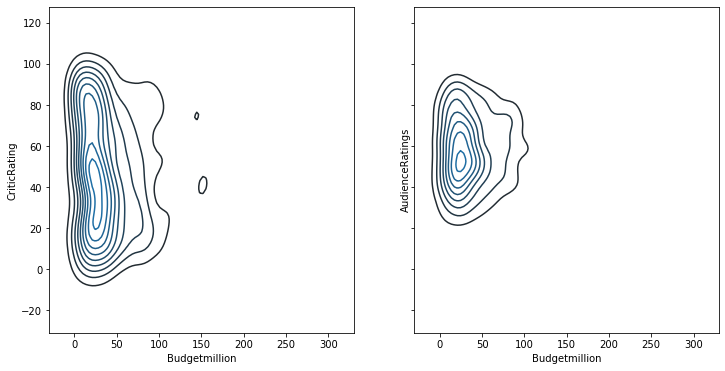

In [36]:
import matplotlib.pyplot as plt
f,axes=plt.subplots(1,2,figsize=(12,6),sharex=True,sharey=True)
sns.kdeplot(movie.Budgetmillion,movie.CriticRating,ax=axes[0])
sns.kdeplot(movie.Budgetmillion,movie.AudienceRatings,ax=axes[1])

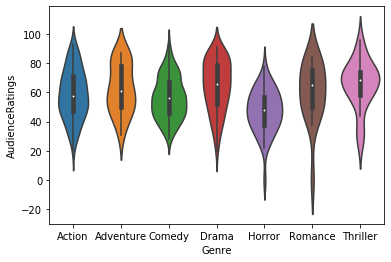

In [38]:
sns.violinplot(data=movie,x="Genre",y='AudienceRatings')

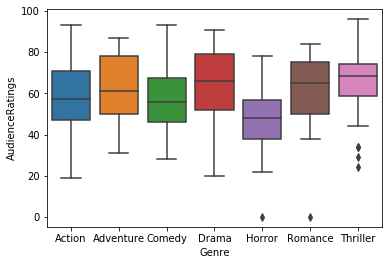

In [39]:
sns.boxplot(data=movie,x="Genre",y='AudienceRatings')

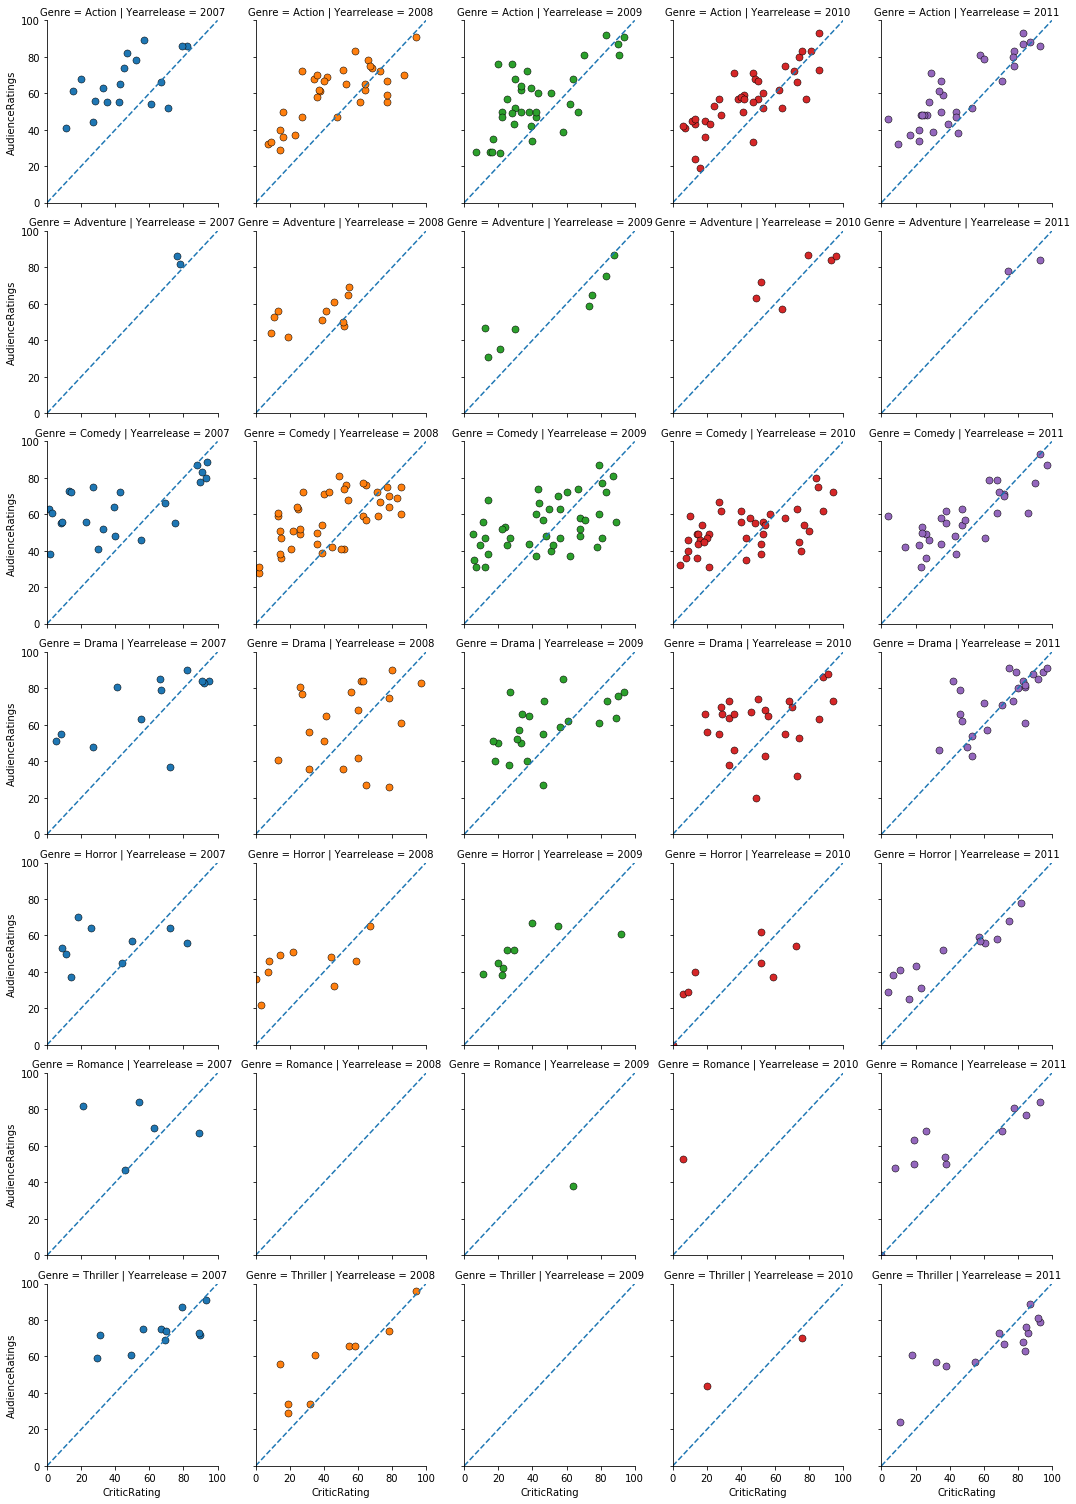

In [53]:
g= sns.FacetGrid(data=movie,row="Genre",col='Yearrelease',hue='Yearrelease')
kws=dict(s=50,linewidth=0.5,edgecolor='black')
g.map(plt.scatter,'CriticRating','AudienceRatings',**kws)
g.set(xlim=(0,100),ylim=(0,100))
for i in g.axes.flat:
    i.plot((0,100),(0,100),ls='--')